In [1]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

# Learning curves for WMAZE participants
### Visually demonstrates learning across all three trial types

Subject WMAZE_001
Stimulus set1


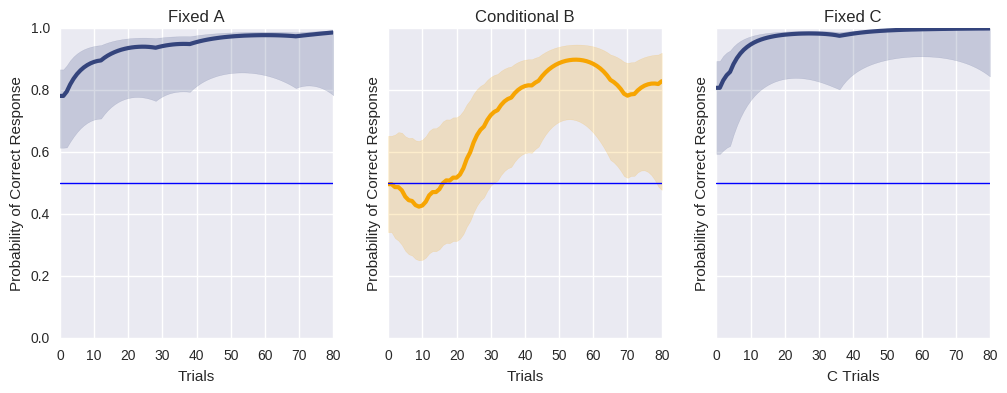

Subject WMAZE_001
Stimulus set2


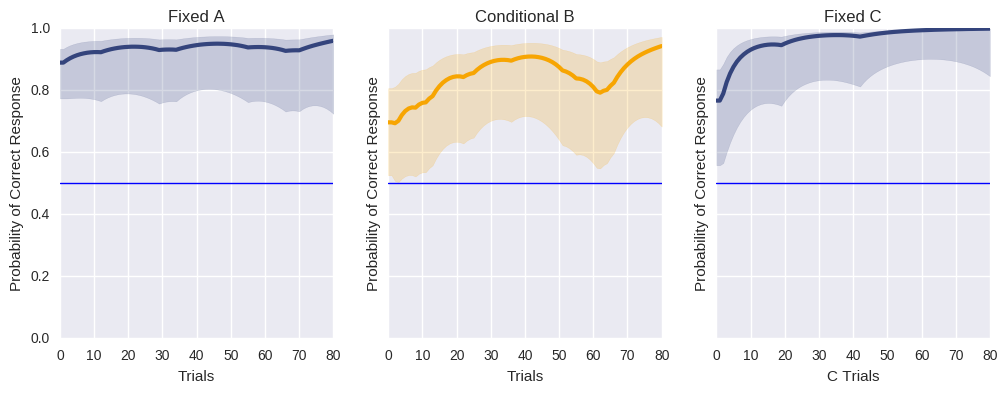

Subject WMAZE_001
Stimulus set3


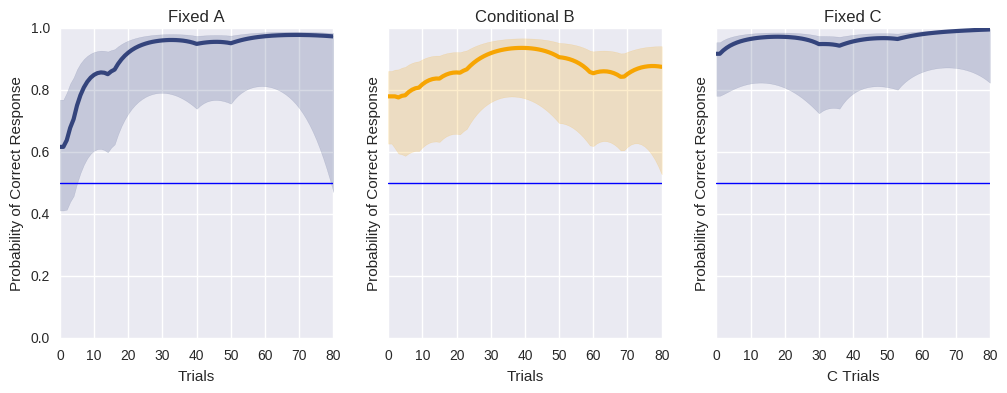

Subject WMAZE_002
Stimulus set1


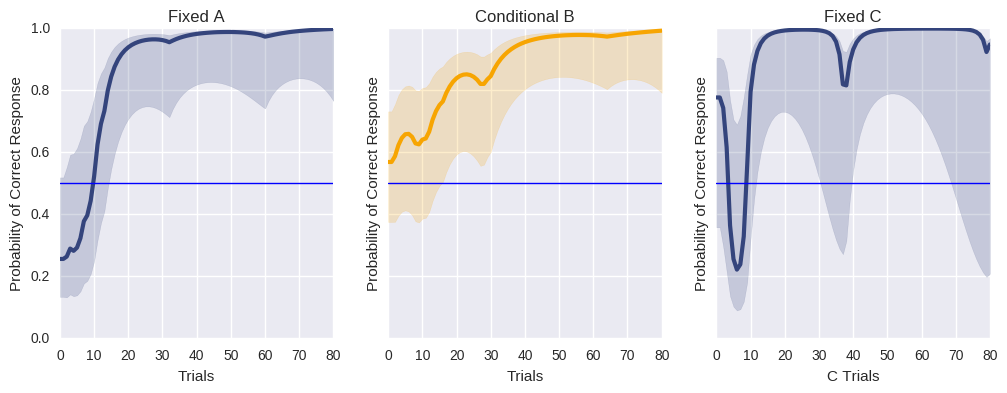

Subject WMAZE_002
Stimulus set2


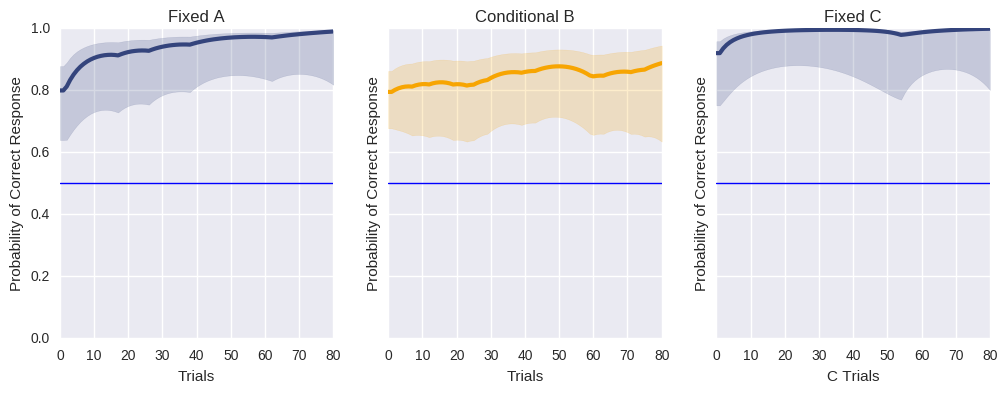

Subject WMAZE_002
Stimulus set3


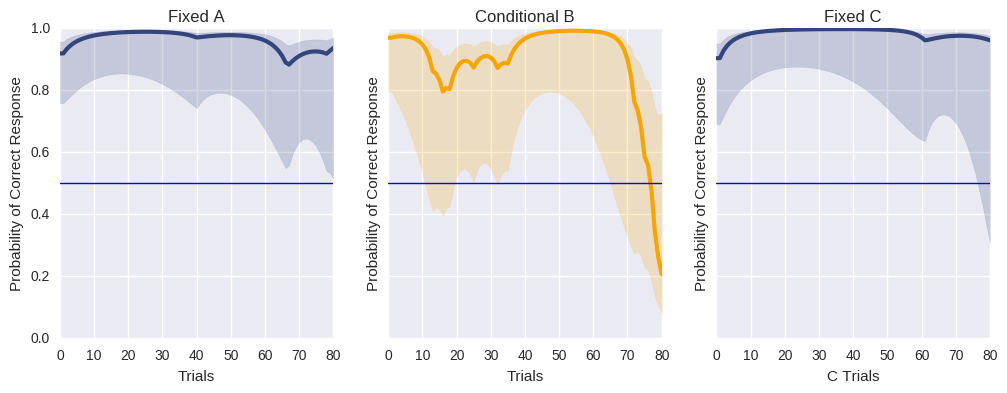

Subject WMAZE_004
Stimulus set1


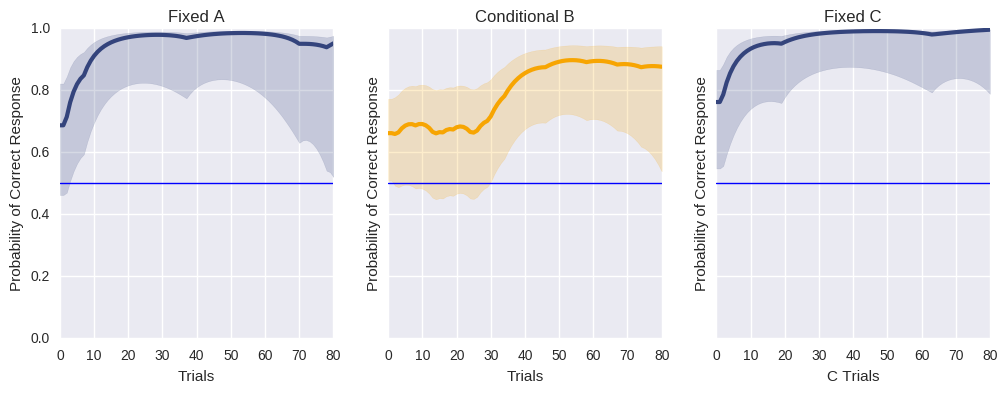

Subject WMAZE_004
Stimulus set2


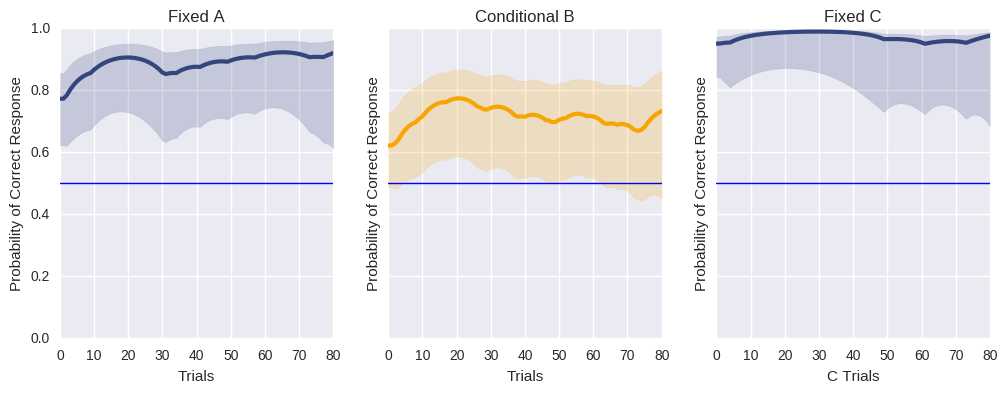

Subject WMAZE_004
Stimulus set3


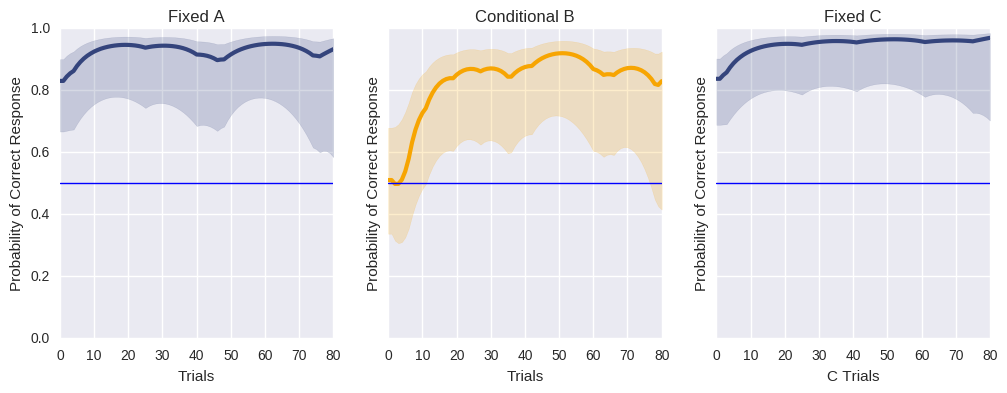

Subject WMAZE_005
Stimulus set1


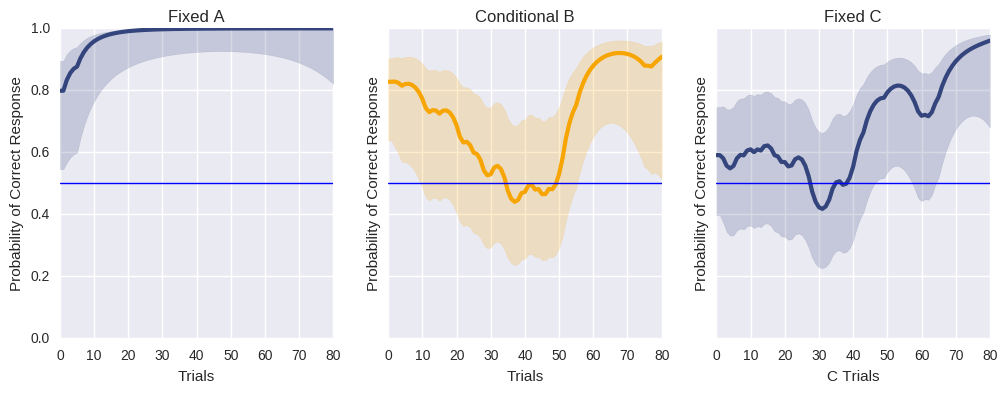

Subject WMAZE_005
Stimulus set2


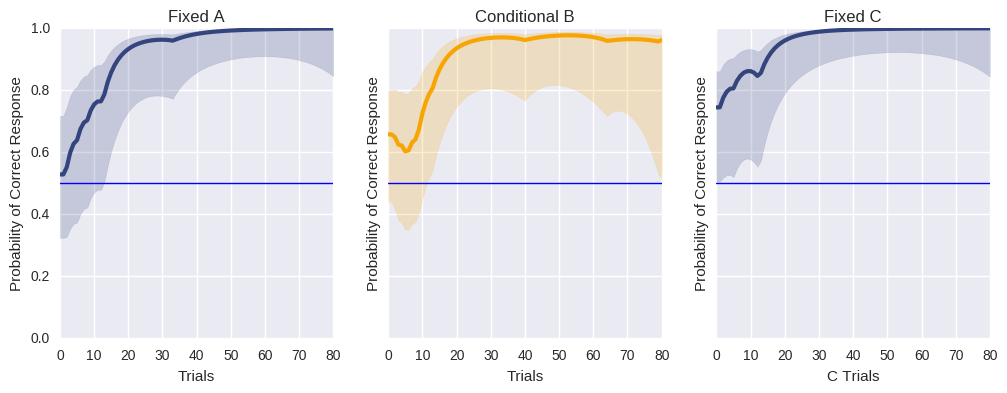

Subject WMAZE_005
Stimulus set3


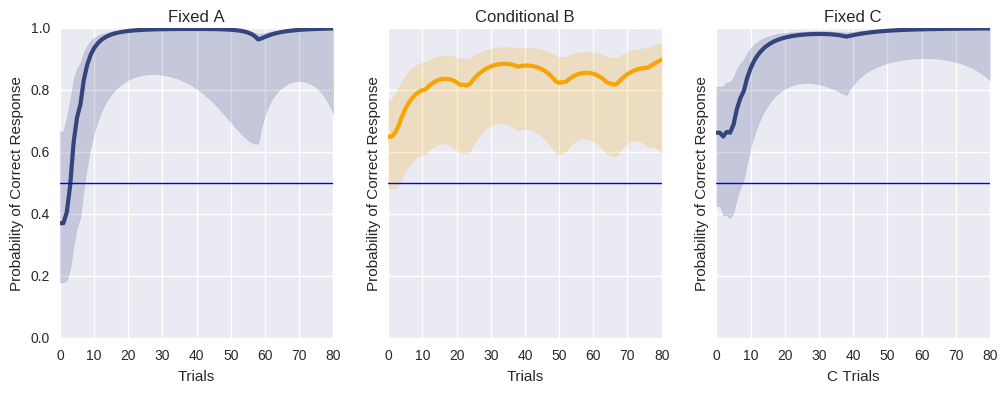

Subject WMAZE_006
Stimulus set1


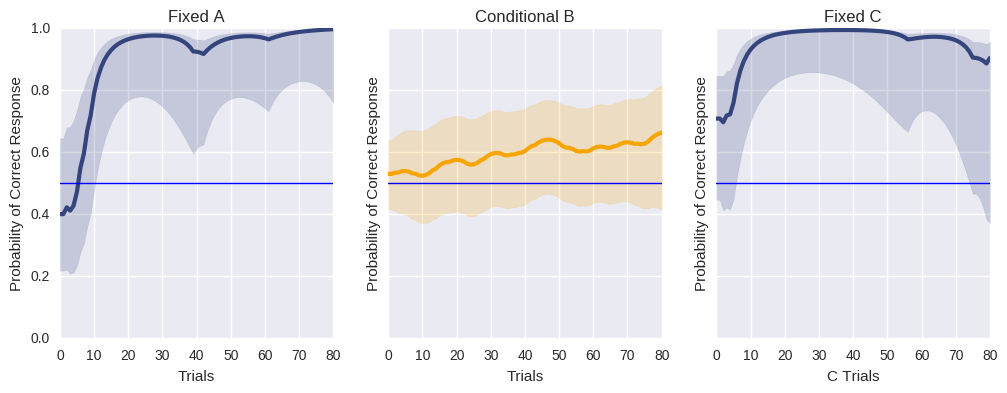

Subject WMAZE_006
Stimulus set2


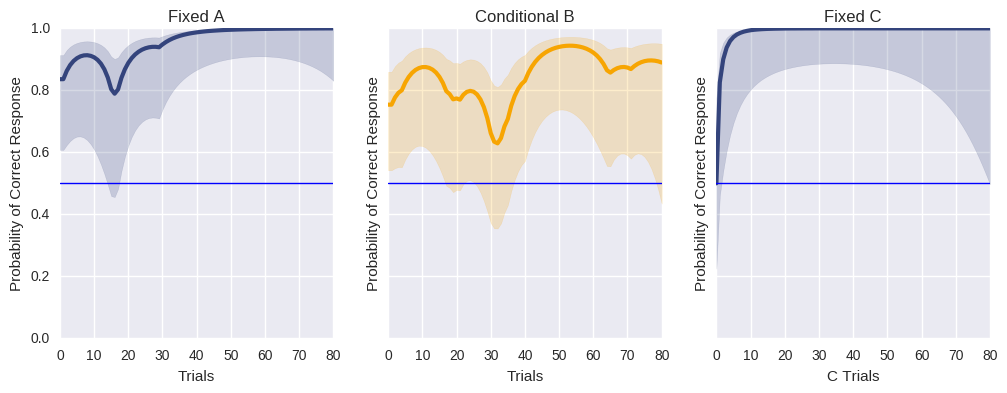

Subject WMAZE_006
Stimulus set3


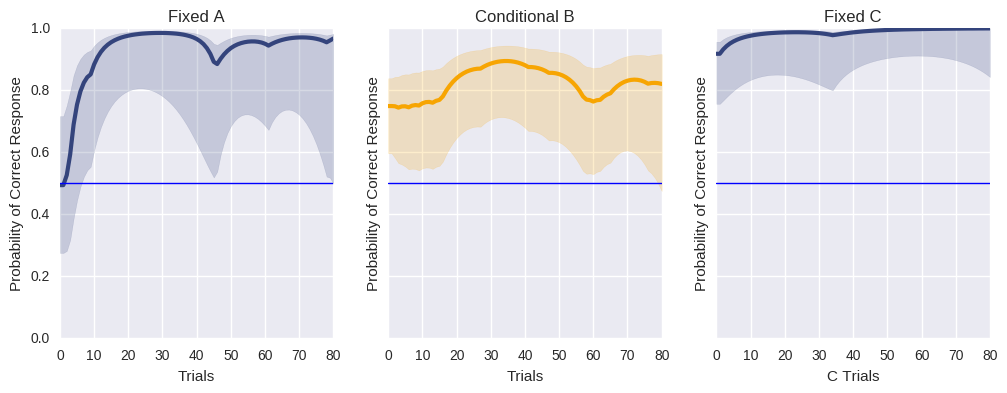

Subject WMAZE_007
Stimulus set1


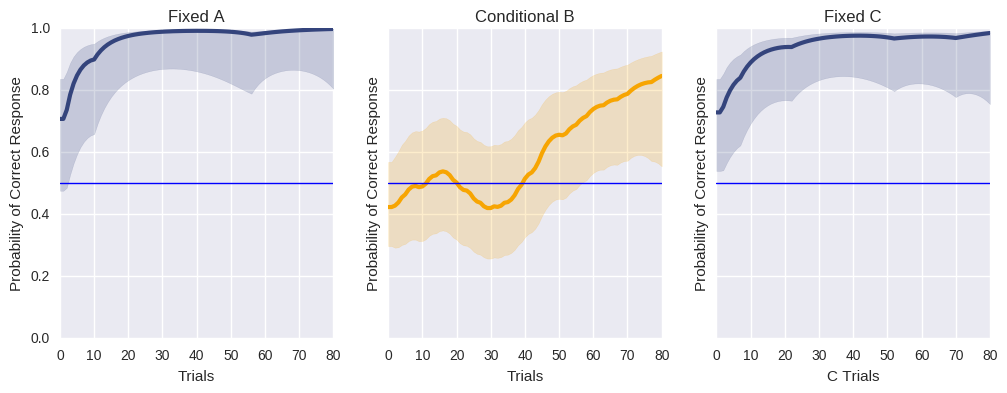

Subject WMAZE_007
Stimulus set2


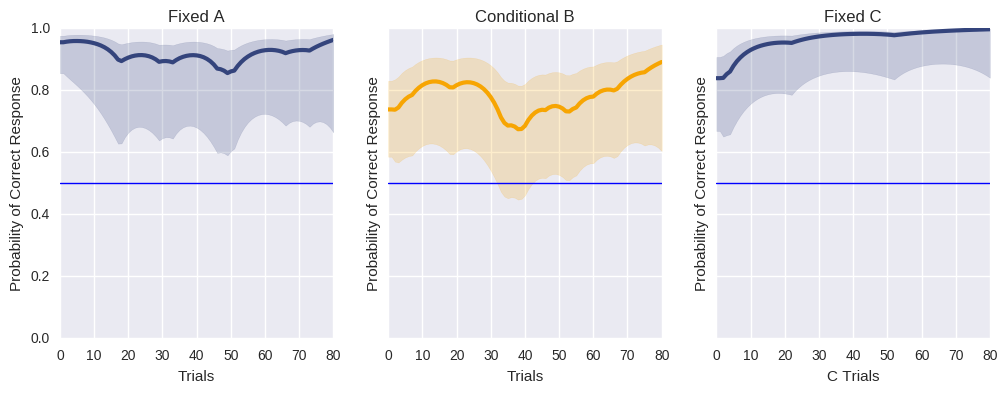

Subject WMAZE_007
Stimulus set3


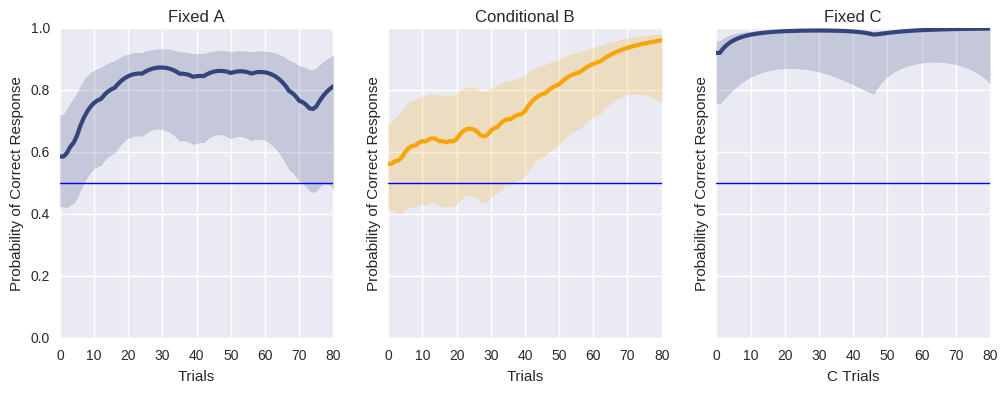

Subject WMAZE_008
Stimulus set1


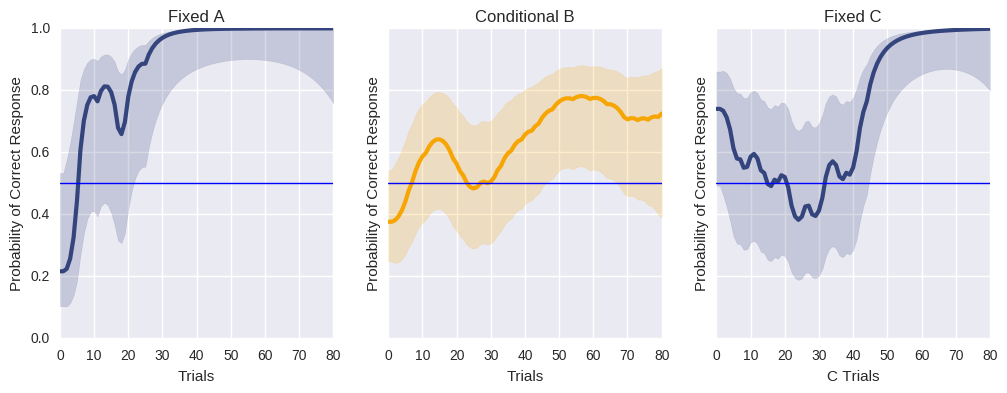

Subject WMAZE_008
Stimulus set2


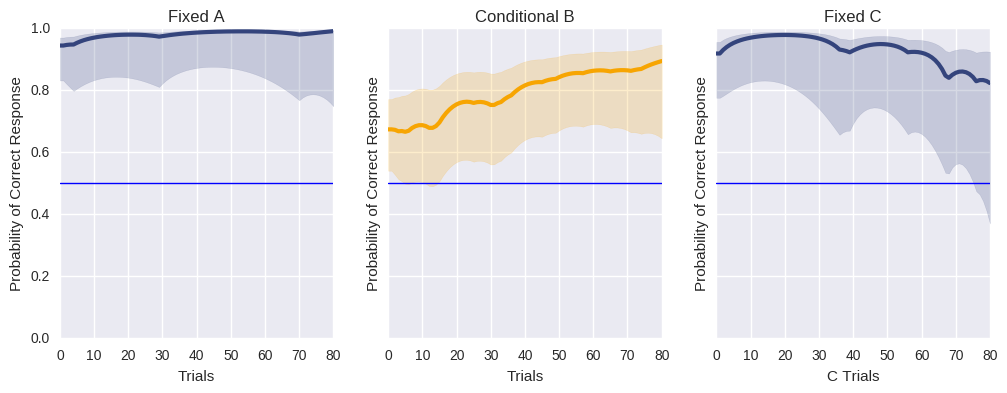

Subject WMAZE_008
Stimulus set3


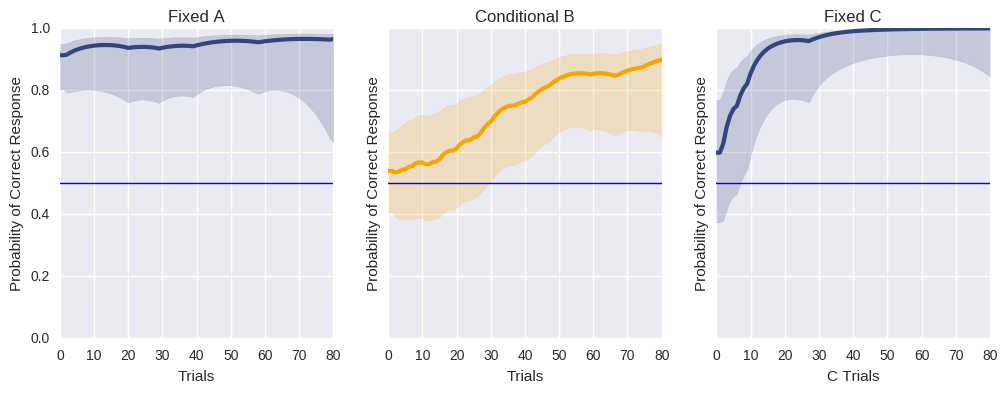

Subject WMAZE_009
Stimulus set1


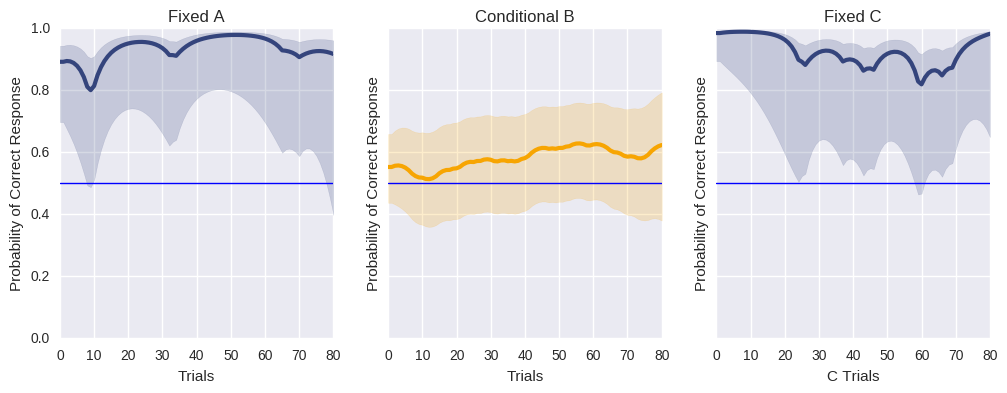

Subject WMAZE_009
Stimulus set2


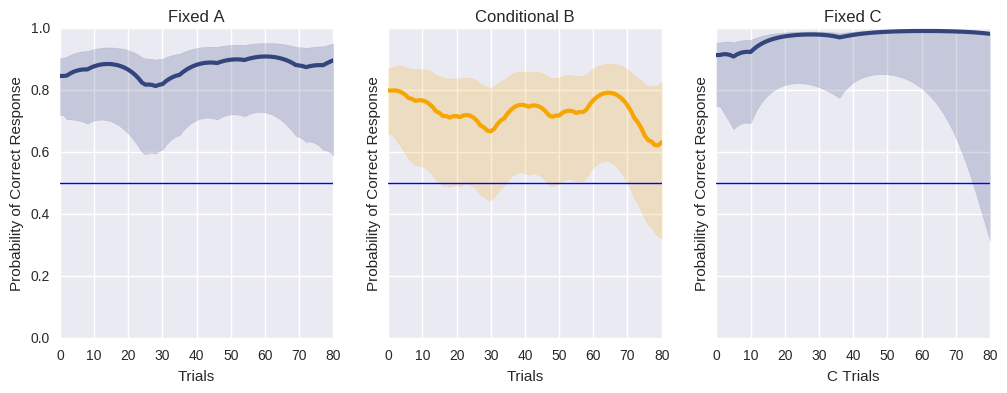

Subject WMAZE_009
Stimulus set3


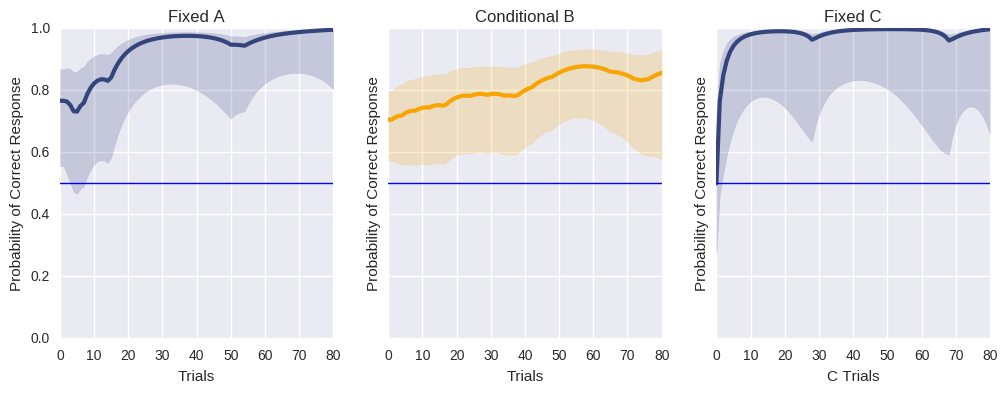

Subject WMAZE_010
Stimulus set1


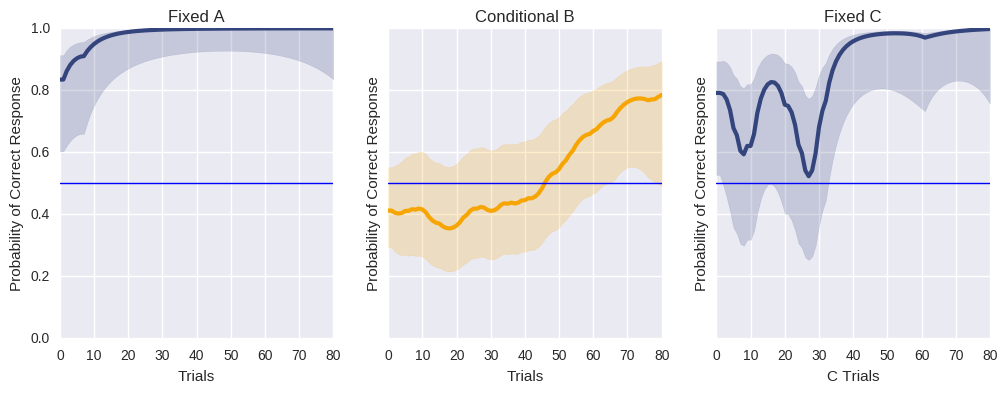

Subject WMAZE_010
Stimulus set2


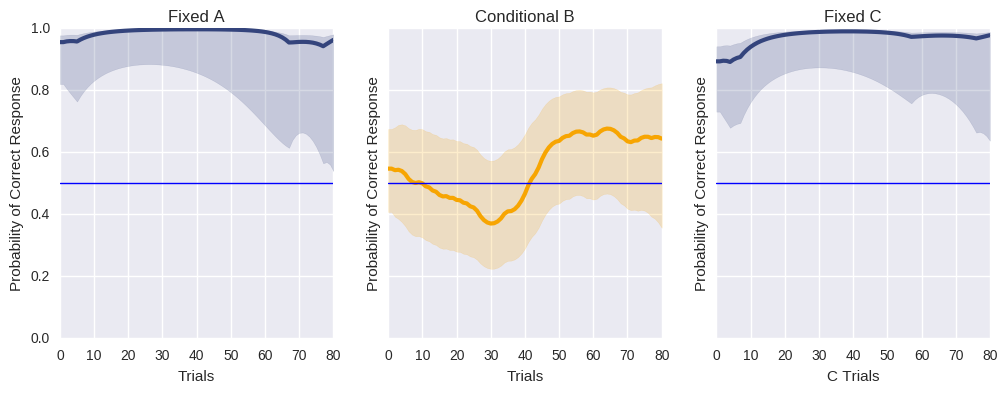

Subject WMAZE_010
Stimulus set3


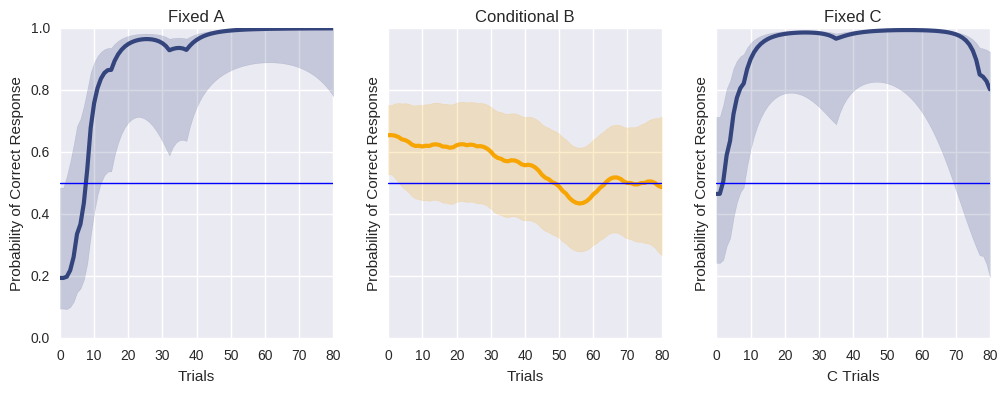

Subject WMAZE_012
Stimulus set1


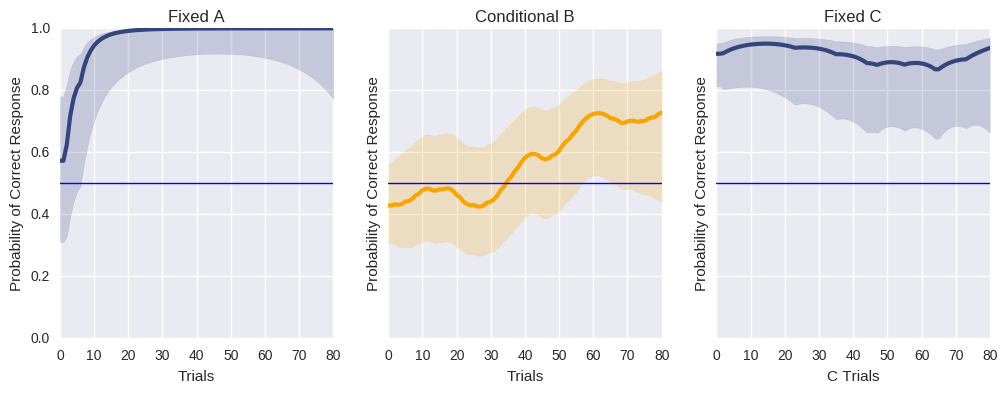

Subject WMAZE_012
Stimulus set2


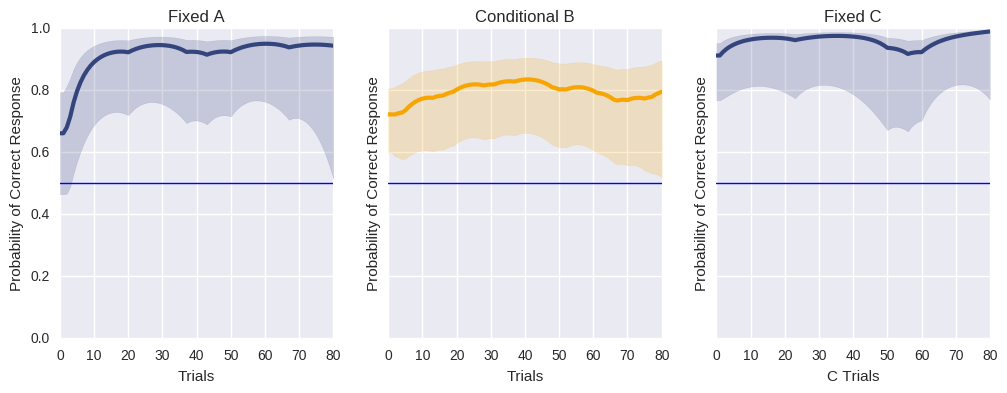

Subject WMAZE_012
Stimulus set3


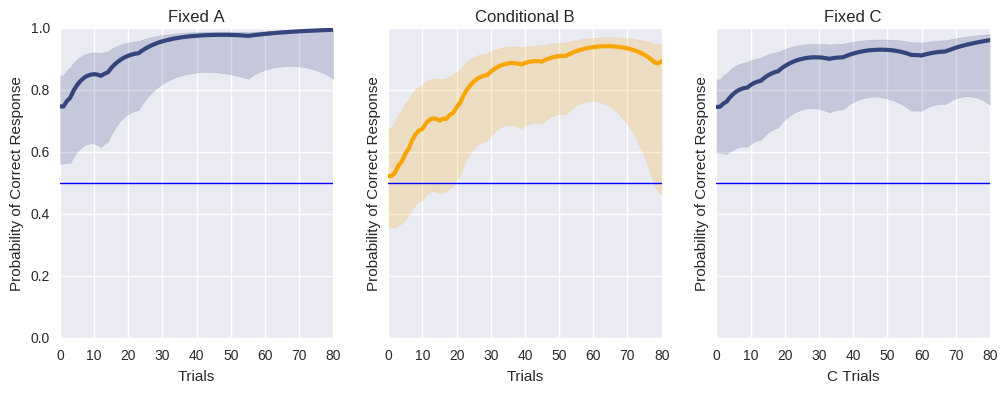

Subject WMAZE_017
Stimulus set1


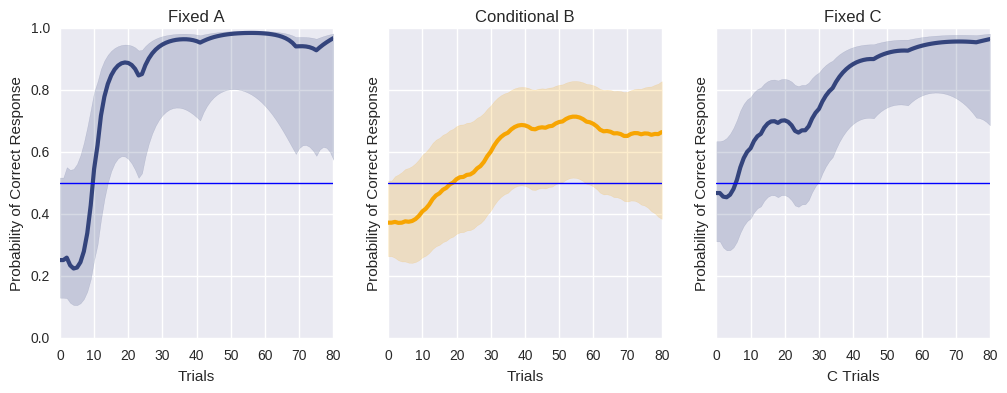

Subject WMAZE_017
Stimulus set2


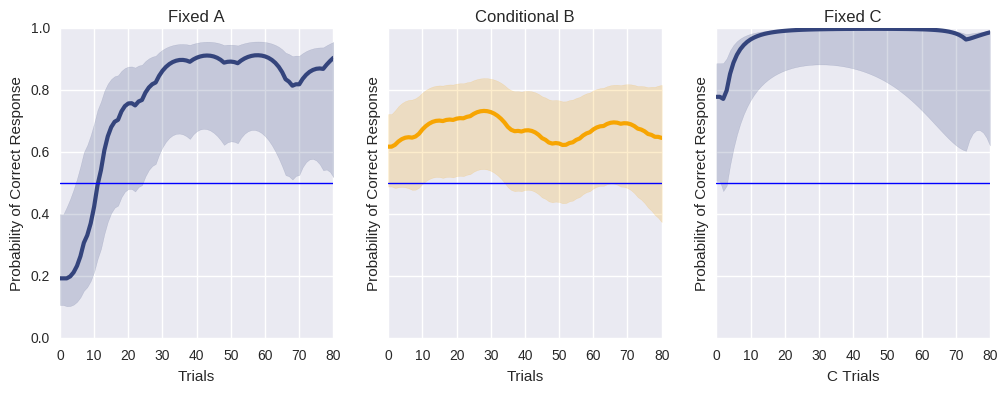

Subject WMAZE_017
Stimulus set3


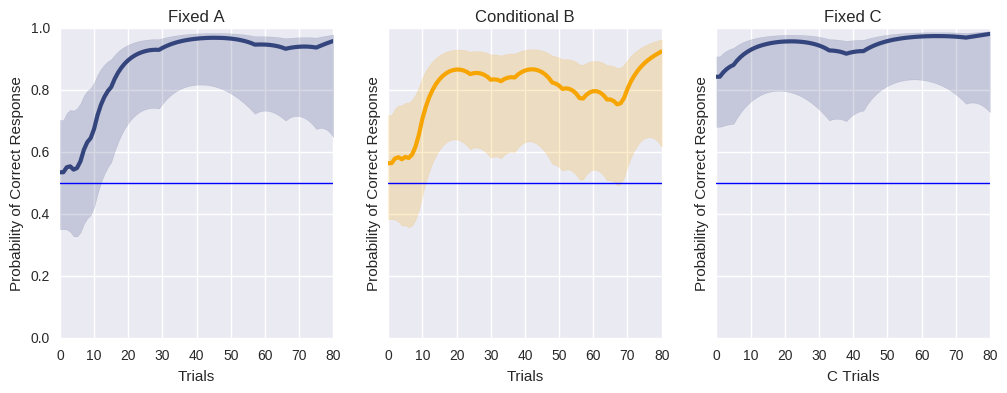

Subject WMAZE_018
Stimulus set1


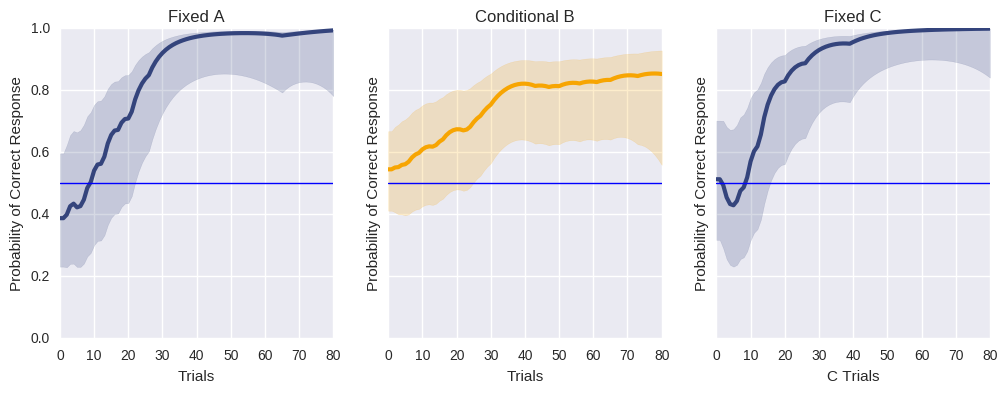

Subject WMAZE_018
Stimulus set2


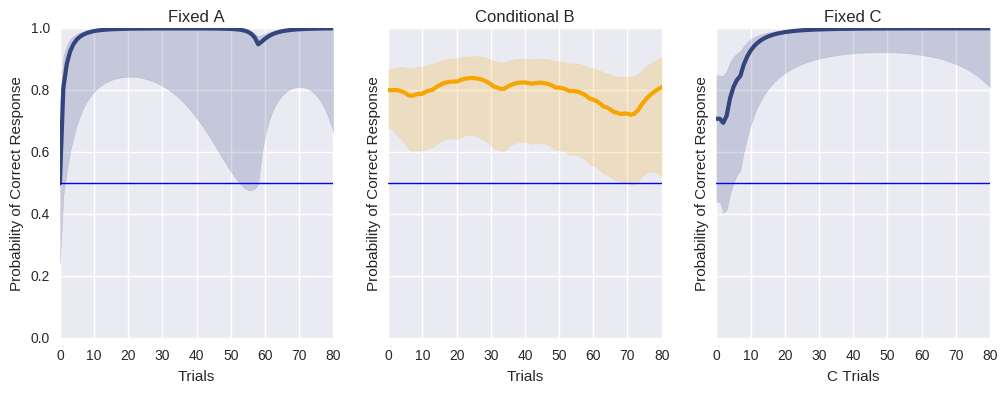

Subject WMAZE_018
Stimulus set3


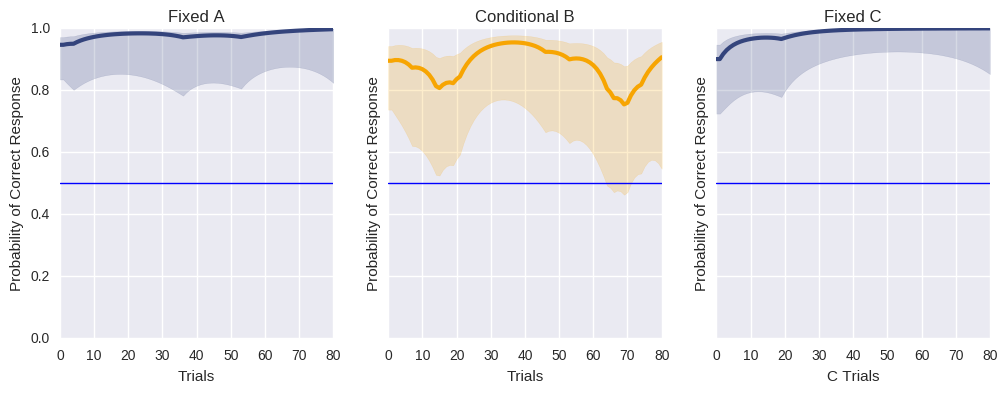

Subject WMAZE_019
Stimulus set1


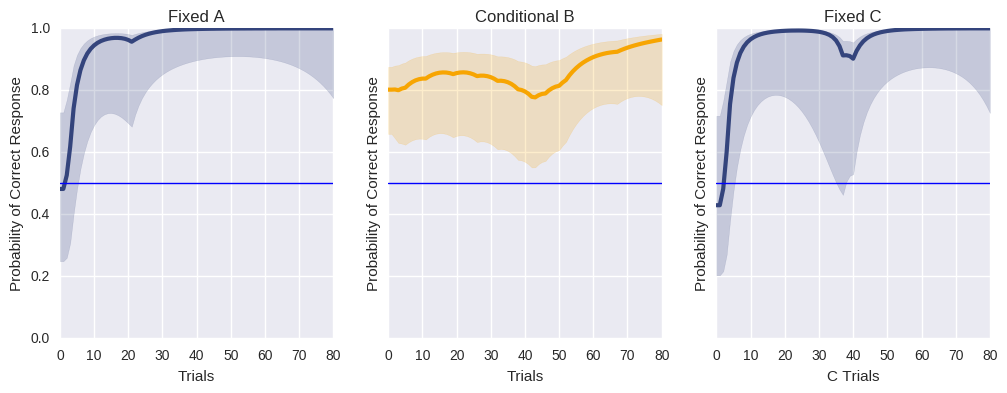

Subject WMAZE_019
Stimulus set2


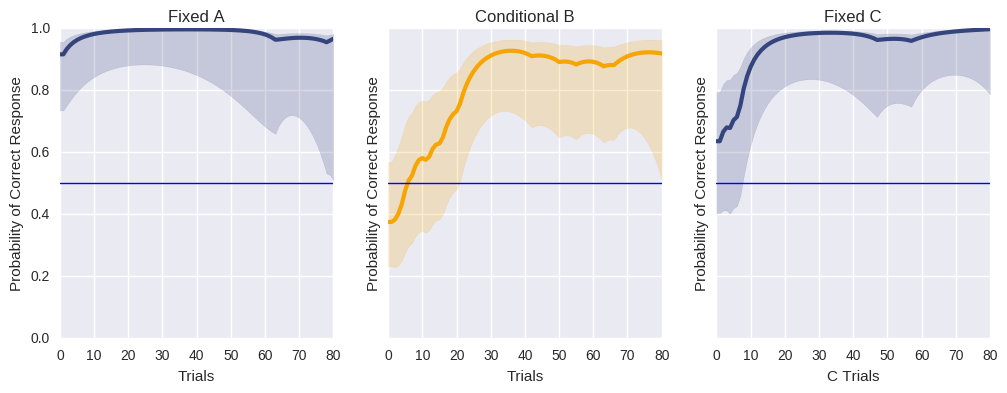

Subject WMAZE_019
Stimulus set3


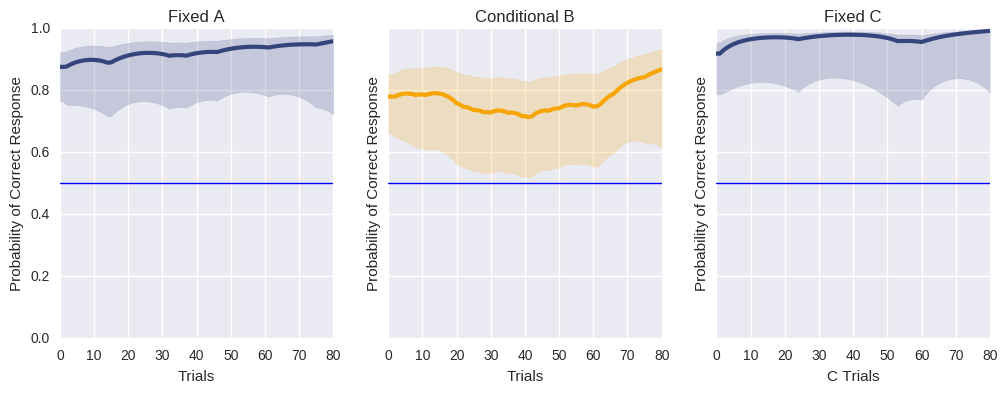

Subject WMAZE_020
Stimulus set1


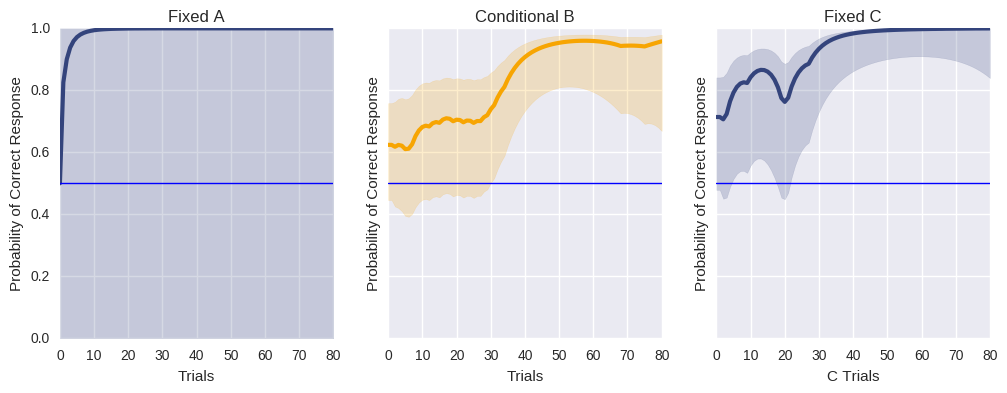

Subject WMAZE_020
Stimulus set2


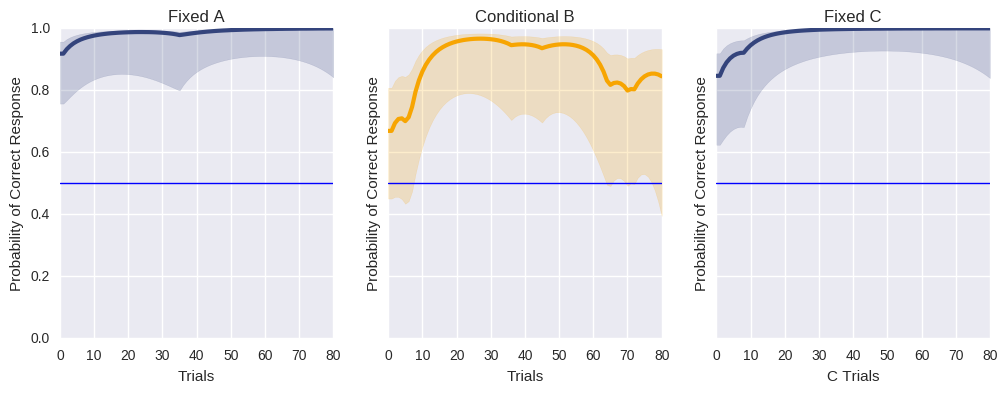

Subject WMAZE_020
Stimulus set3


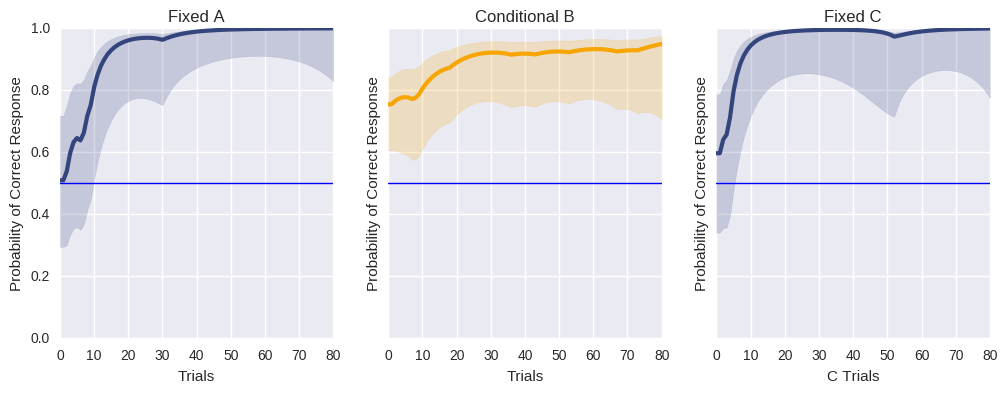

Subject WMAZE_021
Stimulus set1


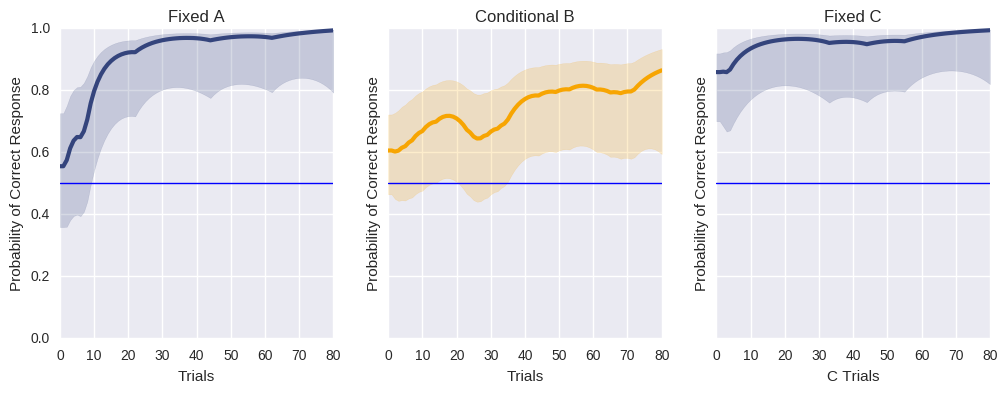

Subject WMAZE_021
Stimulus set2


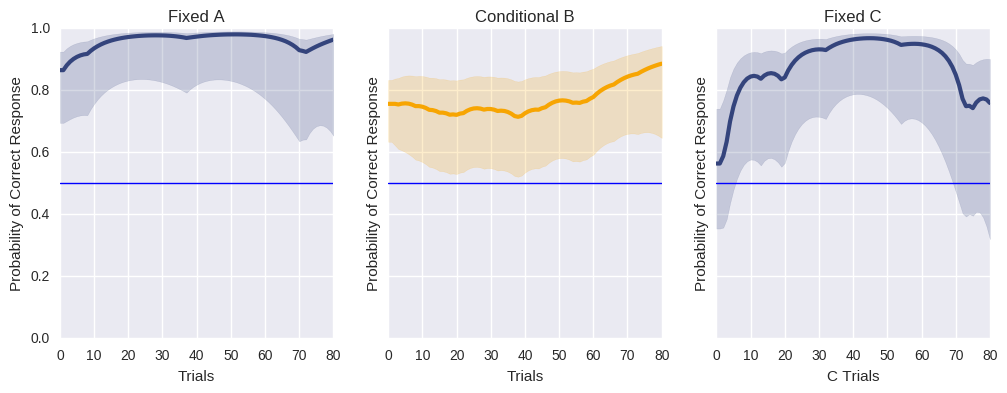

Subject WMAZE_021
Stimulus set3


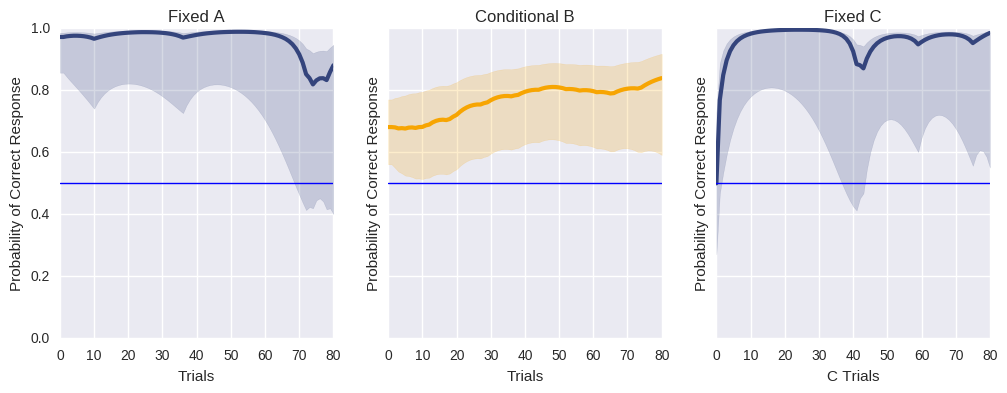

Subject WMAZE_022
Stimulus set1


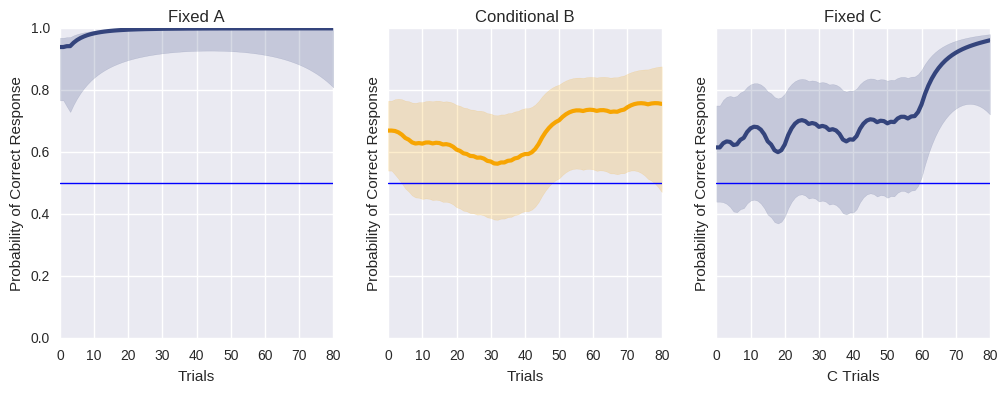

Subject WMAZE_022
Stimulus set2


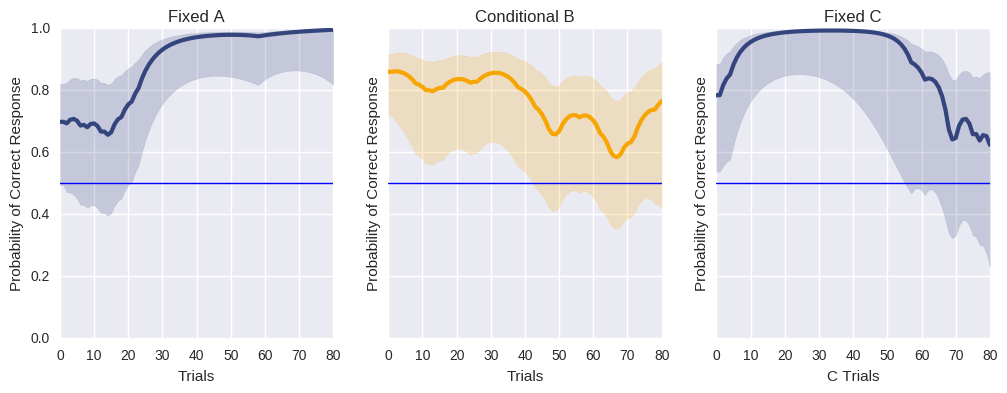

Subject WMAZE_022
Stimulus set3


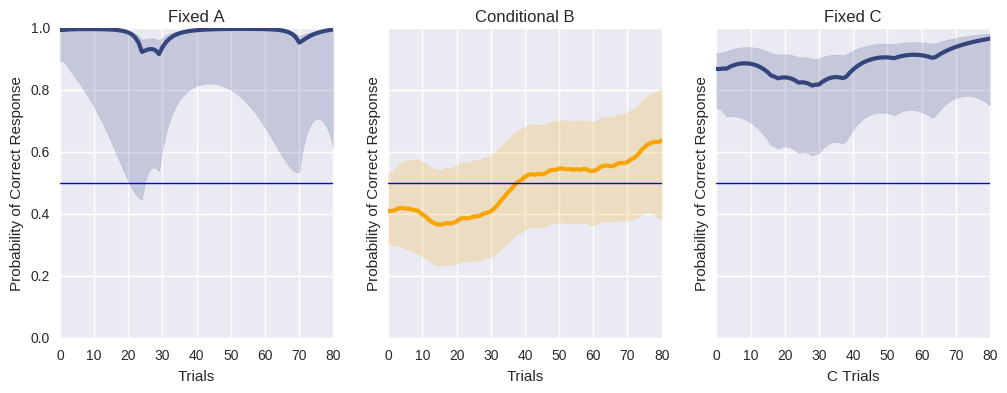

Subject WMAZE_023
Stimulus set1


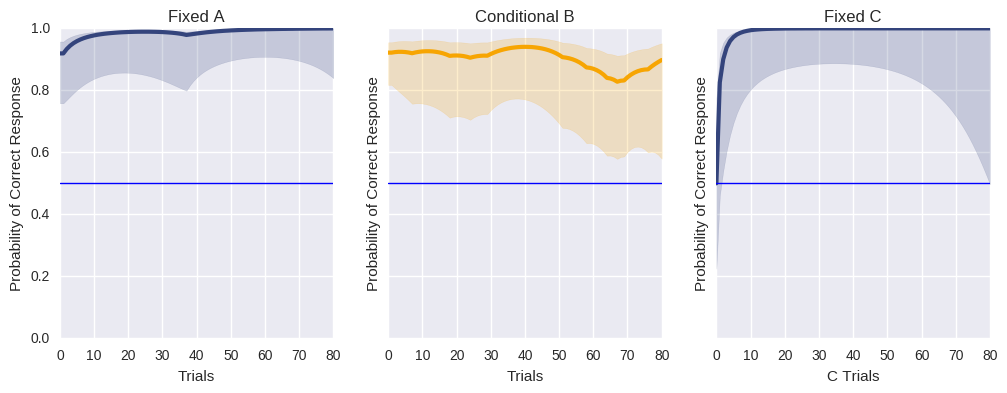

Subject WMAZE_023
Stimulus set2


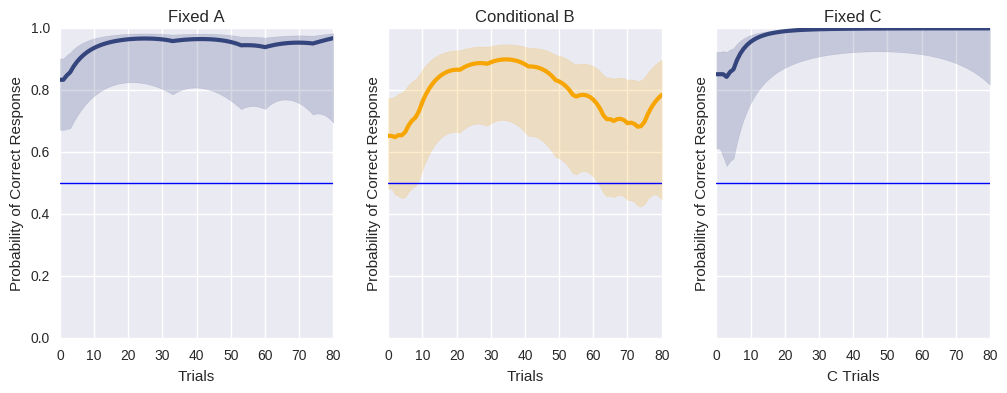

Subject WMAZE_023
Stimulus set3


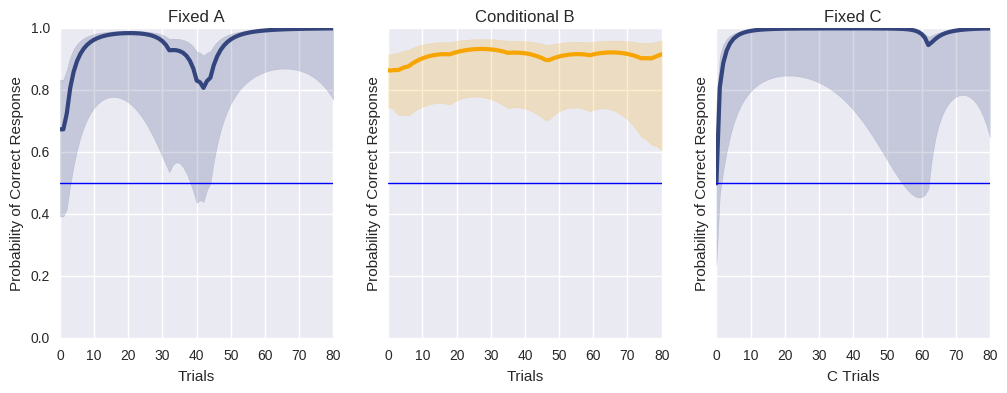

Subject WMAZE_024
Stimulus set1


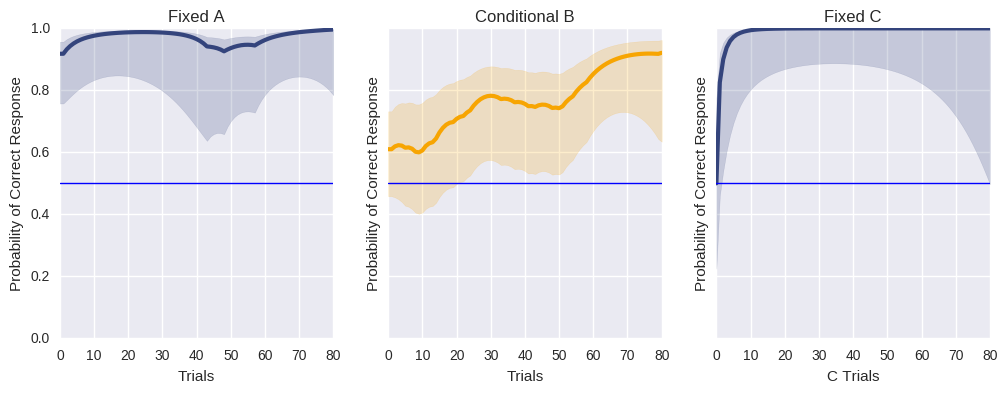

Subject WMAZE_024
Stimulus set2


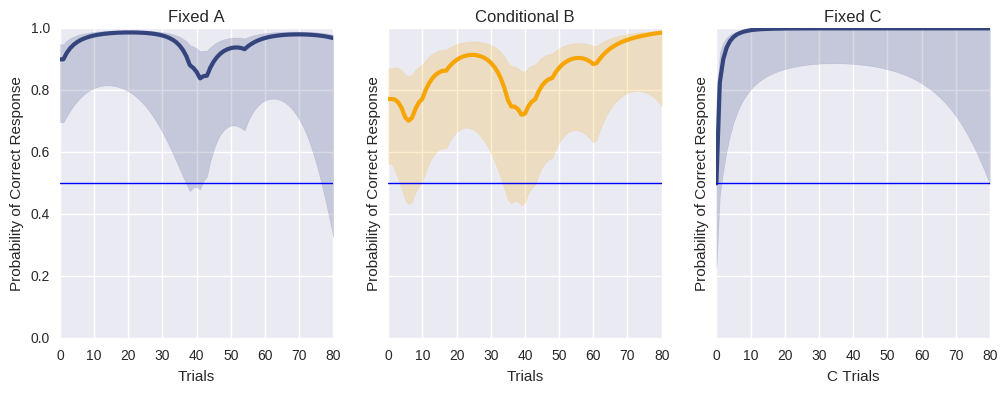

Subject WMAZE_024
Stimulus set3


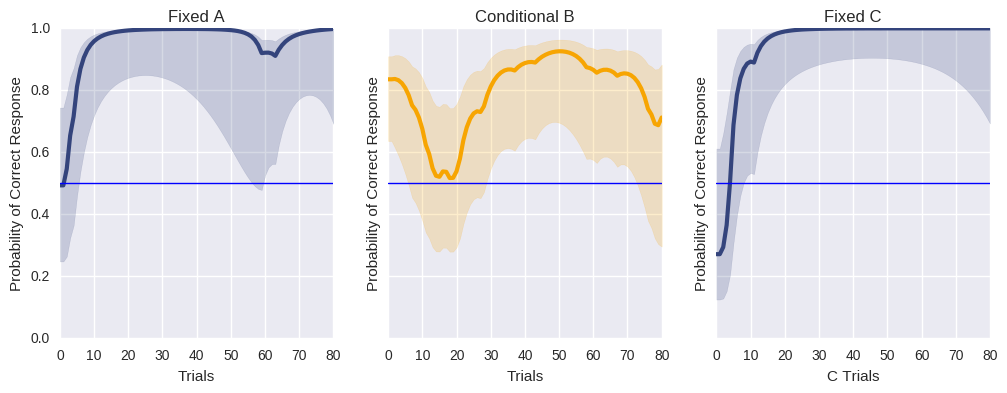

Subject WMAZE_026
Stimulus set1


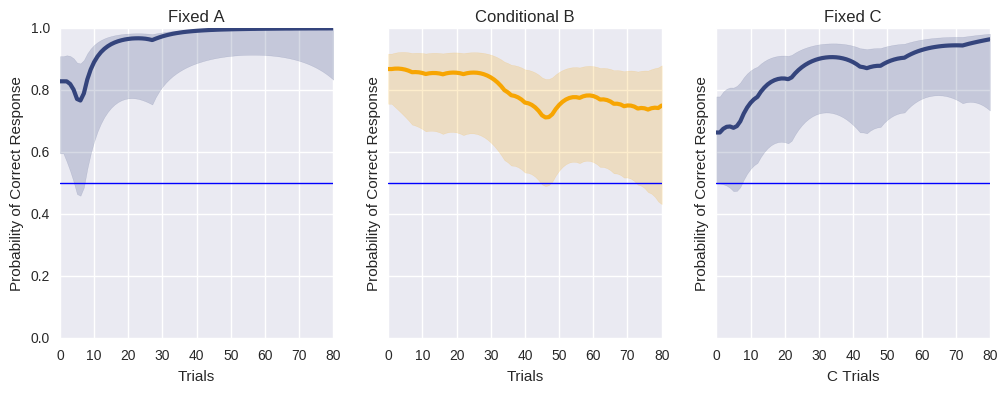

Subject WMAZE_026
Stimulus set2


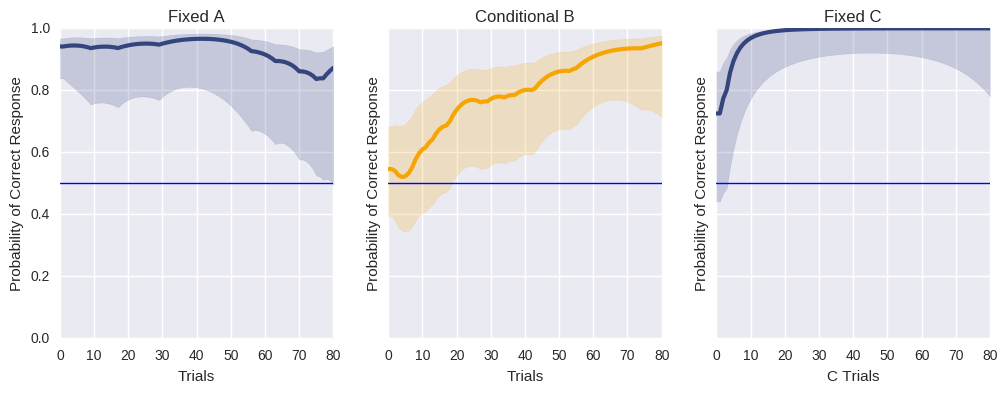

Subject WMAZE_026
Stimulus set3


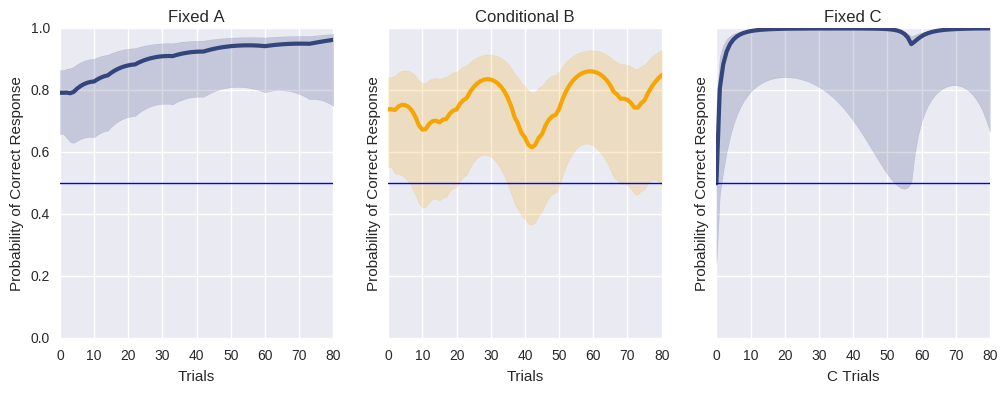

Subject WMAZE_027
Stimulus set1


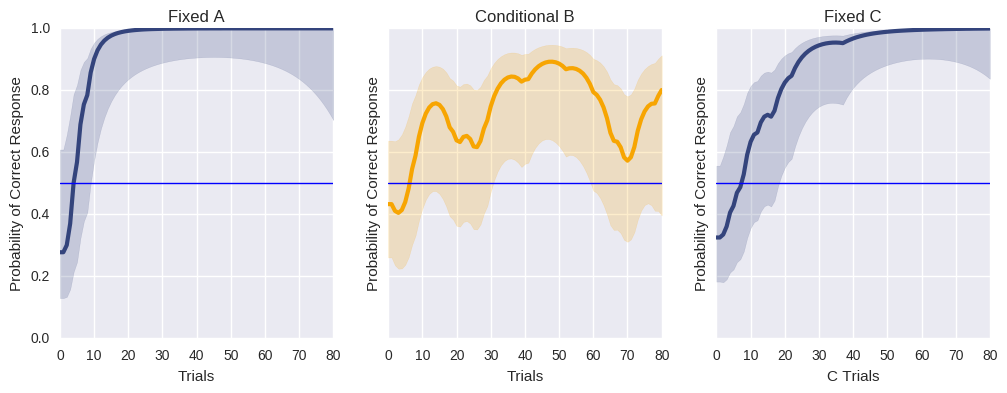

Subject WMAZE_027
Stimulus set2


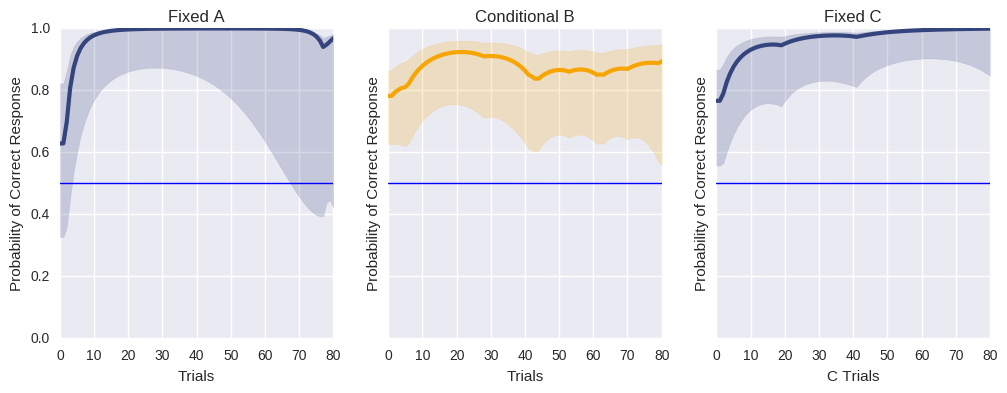

Subject WMAZE_027
Stimulus set3


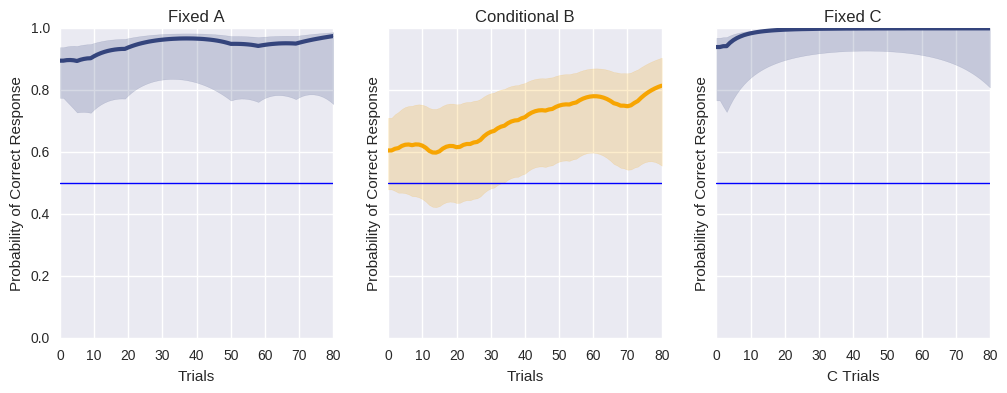

In [2]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


#subs = ['WMAZE_011', 'WMAZE_015', 'WMAZE_016', 'WMAZE_025']
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
images = ['A', 'B', 'C']
sets = ['set1', 'set2', 'set3']


for sub in subs:
    for curr_set in sets:
        stim_dict = {'curve':[], 'up_95':[], 'low_05':[]}
        for image in images:
            sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
            upper_95 = np.loadtxt(join(sub_dir, '{0}_p95_{1}.txt'.format(image, curr_set)))
            stim_dict['up_95'].append(upper_95)
            lower_05 = np.loadtxt(join(sub_dir, '{0}_p05_{1}.txt'.format(image, curr_set)))
            stim_dict['low_05'].append(lower_05)
            learning = np.loadtxt(join(sub_dir, '{0}_pmode_{1}.txt'.format(image, curr_set)))
            stim_dict['curve'].append(learning)
            
        fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize=(12, 4), sharex = True, sharey = True)
        x0 = range(len(stim_dict['curve'][0]))
        chance0 = np.ones(len(x0)) * 0.5
        ax0.plot(x0, stim_dict['curve'][0], "#34447c", linewidth = 3)
        ax0.plot(x0, chance0, 'b', linewidth = 1)
        ax0.fill_between(x0, stim_dict['curve'][0], stim_dict['up_95'][0], color = "#34447c", alpha = 0.2)
        ax0.fill_between(x0, stim_dict['curve'][0], stim_dict['low_05'][0], color = "#34447c", alpha = 0.2)
        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')
        ax0.set_title('Fixed A')

        x1 = range(len(stim_dict['curve'][1]))
        chance1 = np.ones(len(x1)) * 0.5
        ax1.plot(x1, stim_dict['curve'][1], "#f7a502", linewidth = 3)
        ax1.plot(x1, chance1, 'b', linewidth = 1)
        ax1.fill_between(x1, stim_dict['curve'][1], stim_dict['up_95'][1], color = "#f7a502", alpha = 0.2)
        ax1.fill_between(x1, stim_dict['curve'][1], stim_dict['low_05'][1], color = "#f7a502", alpha = 0.2)
        ax1.set_ylim(0,1)
        ax1.set_xlabel('Trials')
        ax1.set_ylabel('Probability of Correct Response')
        ax1.set_title('Conditional B')

        x2 = range(len(stim_dict['curve'][2]))
        chance2 = np.ones(len(x2)) * 0.5
        ax2.plot(x2, stim_dict['curve'][2], "#34447c", linewidth = 3)
        ax2.plot(x2, chance2, 'b', linewidth = 1)
        ax2.fill_between(x2, stim_dict['curve'][2], stim_dict['up_95'][2], color = "#34447c", alpha = 0.2)
        ax2.fill_between(x2, stim_dict['curve'][2], stim_dict['low_05'][2], color = "#34447c", alpha = 0.2)
        ax2.set_ylim(0,1)
        ax2.set_xlabel('C Trials')
        ax2.set_ylabel('Probability of Correct Response')
        ax2.set_title('Fixed C')

        print 'Subject ' + sub
        print 'Stimulus ' + curr_set

        plt.show()


# Learning curves for *removed* WMAZE participants
### Visually demonstrates learning across all three trial types

Subject WMAZE_011
Stimulus set1


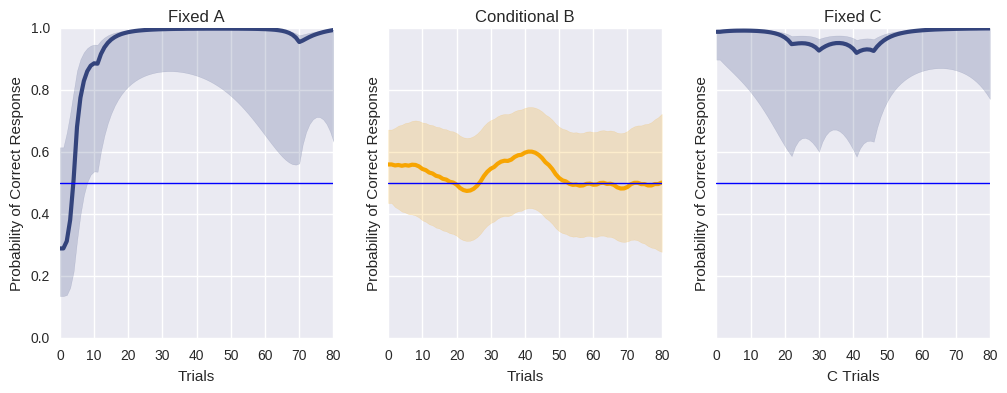

Subject WMAZE_011
Stimulus set2


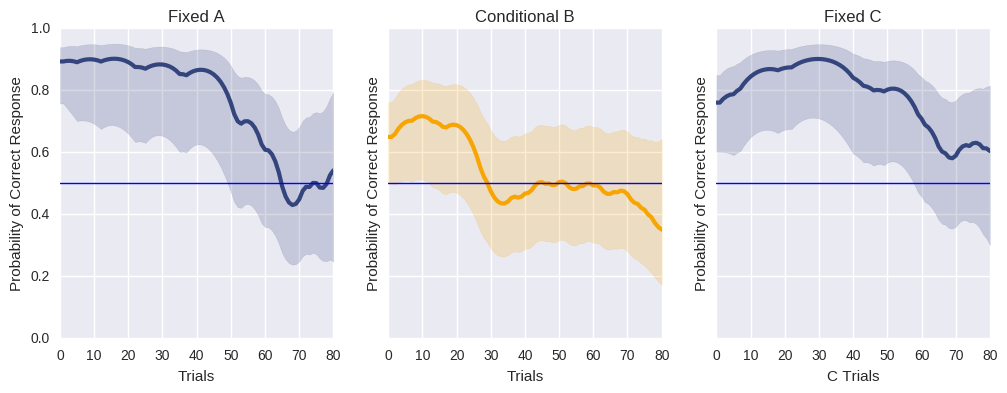

Subject WMAZE_011
Stimulus set3


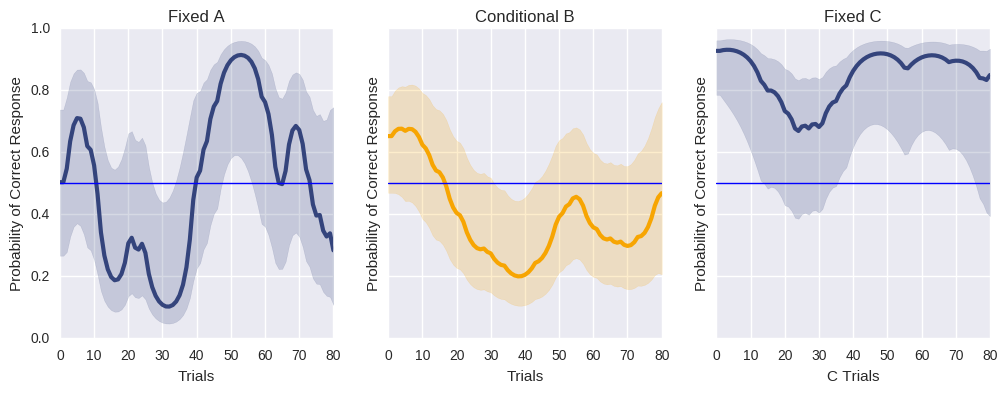

Subject WMAZE_015
Stimulus set1


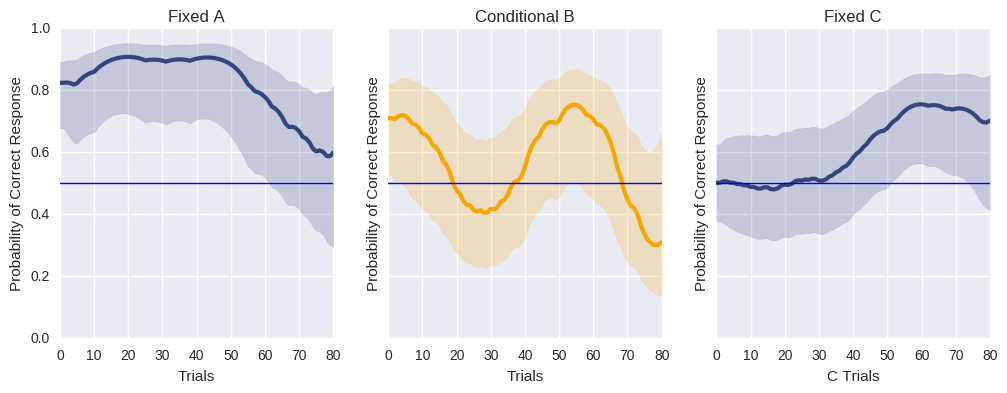

Subject WMAZE_015
Stimulus set2


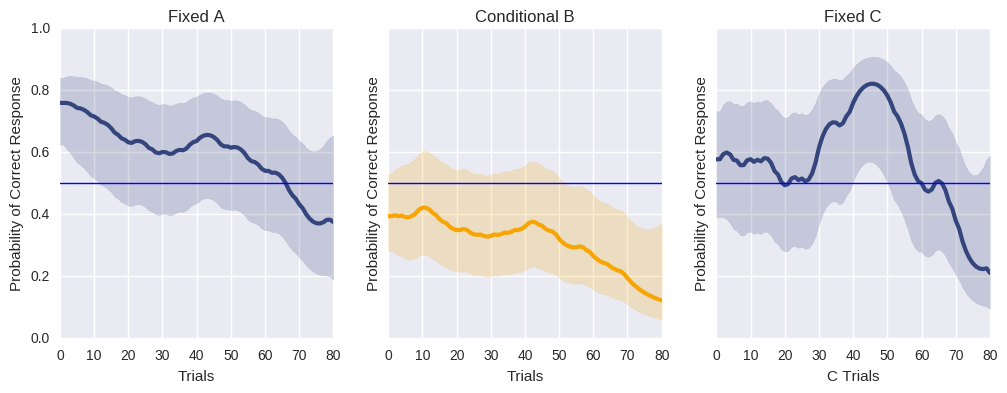

Subject WMAZE_015
Stimulus set3


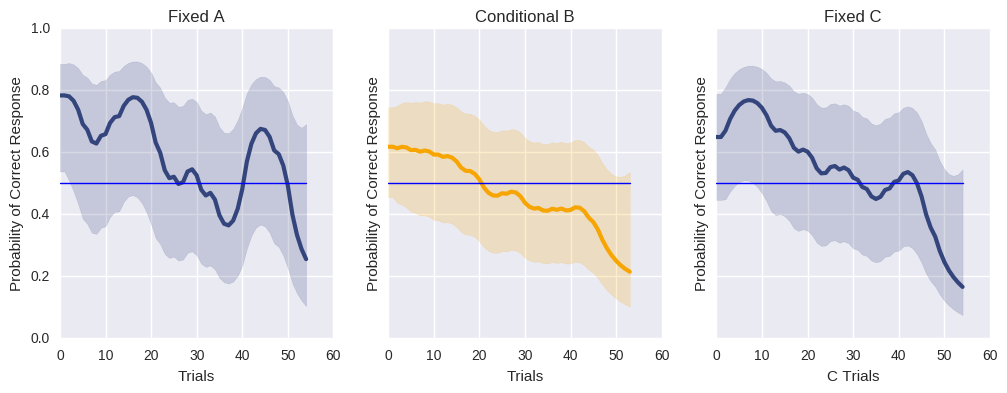

Subject WMAZE_016
Stimulus set1


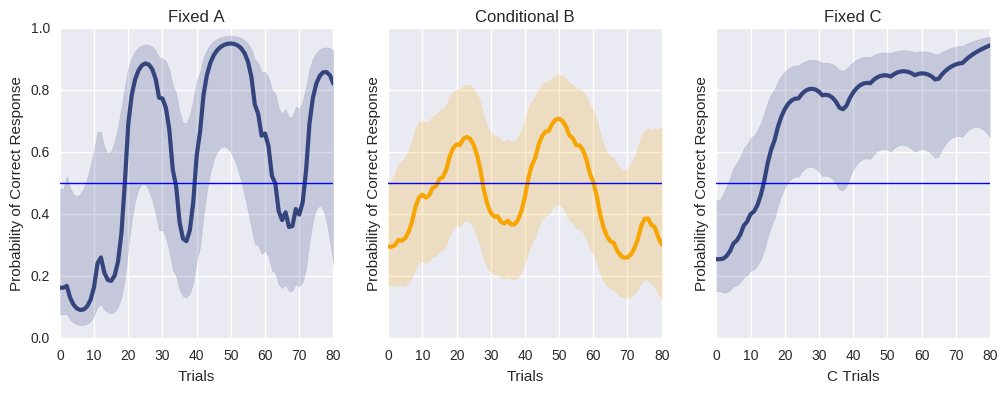

Subject WMAZE_016
Stimulus set2


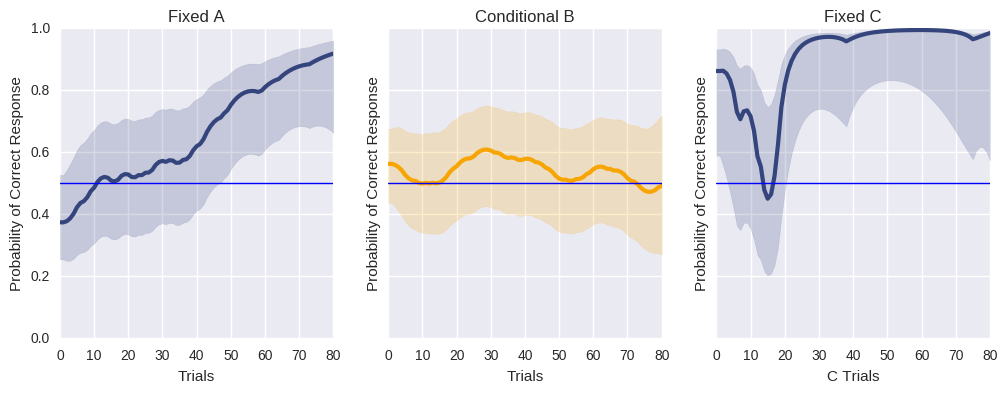

Subject WMAZE_016
Stimulus set3


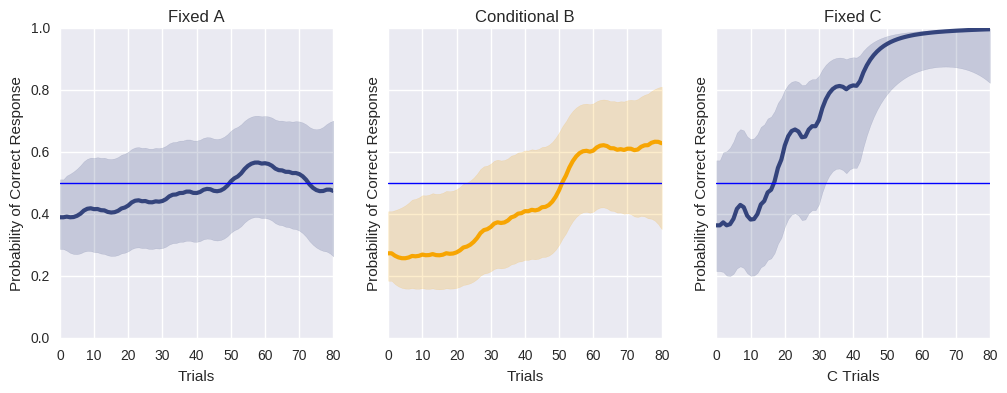

Subject WMAZE_025
Stimulus set1


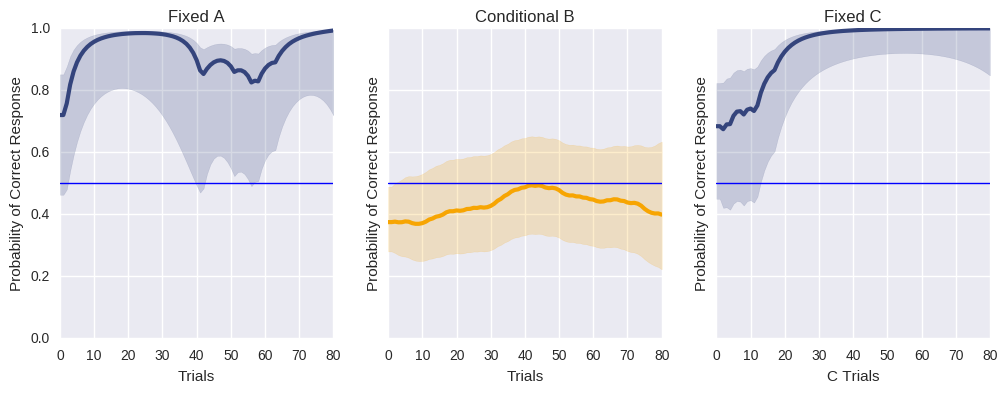

Subject WMAZE_025
Stimulus set2


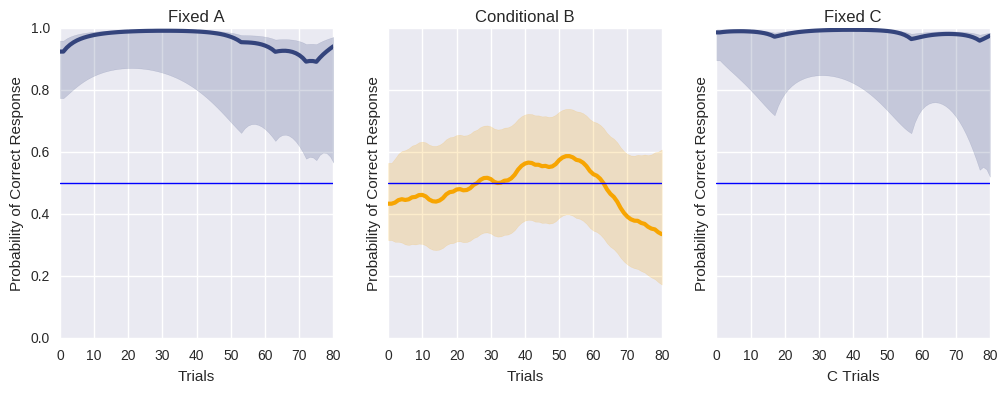

Subject WMAZE_025
Stimulus set3


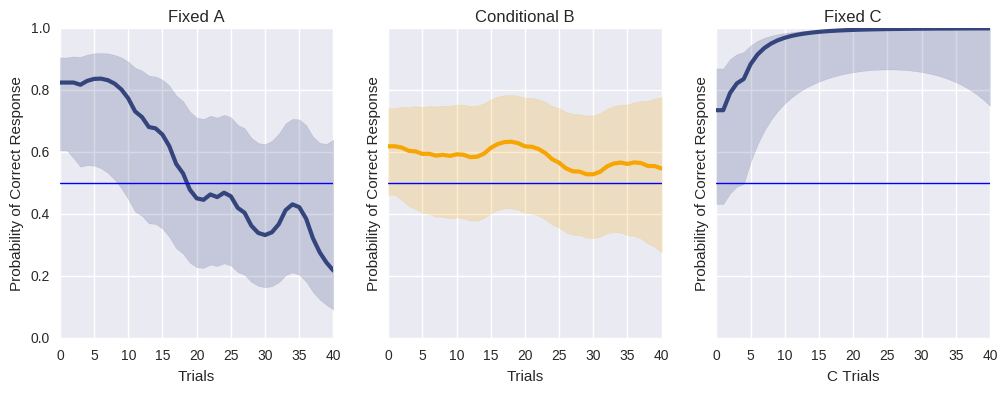

In [3]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


subs = ['WMAZE_011', 'WMAZE_015', 'WMAZE_016', 'WMAZE_025']
images = ['A', 'B', 'C']
sets = ['set1', 'set2', 'set3']


for sub in subs:
    for curr_set in sets:
        stim_dict = {'curve':[], 'up_95':[], 'low_05':[]}
        for image in images:
            sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
            upper_95 = np.loadtxt(join(sub_dir, '{0}_p95_{1}.txt'.format(image, curr_set)))
            stim_dict['up_95'].append(upper_95)
            lower_05 = np.loadtxt(join(sub_dir, '{0}_p05_{1}.txt'.format(image, curr_set)))
            stim_dict['low_05'].append(lower_05)
            learning = np.loadtxt(join(sub_dir, '{0}_pmode_{1}.txt'.format(image, curr_set)))
            stim_dict['curve'].append(learning)
            
        fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize=(12, 4), sharex = True, sharey = True)
        x0 = range(len(stim_dict['curve'][0]))
        chance0 = np.ones(len(x0)) * 0.5
        ax0.plot(x0, stim_dict['curve'][0], "#34447c", linewidth = 3)
        ax0.plot(x0, chance0, 'b', linewidth = 1)
        ax0.fill_between(x0, stim_dict['curve'][0], stim_dict['up_95'][0], color = "#34447c", alpha = 0.2)
        ax0.fill_between(x0, stim_dict['curve'][0], stim_dict['low_05'][0], color = "#34447c", alpha = 0.2)
        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')
        ax0.set_title('Fixed A')

        x1 = range(len(stim_dict['curve'][1]))
        chance1 = np.ones(len(x1)) * 0.5
        ax1.plot(x1, stim_dict['curve'][1], "#f7a502", linewidth = 3)
        ax1.plot(x1, chance1, 'b', linewidth = 1)
        ax1.fill_between(x1, stim_dict['curve'][1], stim_dict['up_95'][1], color = "#f7a502", alpha = 0.2)
        ax1.fill_between(x1, stim_dict['curve'][1], stim_dict['low_05'][1], color = "#f7a502", alpha = 0.2)
        ax1.set_ylim(0,1)
        ax1.set_xlabel('Trials')
        ax1.set_ylabel('Probability of Correct Response')
        ax1.set_title('Conditional B')

        x2 = range(len(stim_dict['curve'][2]))
        chance2 = np.ones(len(x2)) * 0.5
        ax2.plot(x2, stim_dict['curve'][2], "#34447c", linewidth = 3)
        ax2.plot(x2, chance2, 'b', linewidth = 1)
        ax2.fill_between(x2, stim_dict['curve'][2], stim_dict['up_95'][2], color = "#34447c", alpha = 0.2)
        ax2.fill_between(x2, stim_dict['curve'][2], stim_dict['low_05'][2], color = "#34447c", alpha = 0.2)
        ax2.set_ylim(0,1)
        ax2.set_xlabel('C Trials')
        ax2.set_ylabel('Probability of Correct Response')
        ax2.set_title('Fixed C')

        print 'Subject ' + sub
        print 'Stimulus ' + curr_set

        plt.show()
